# South African Language Identification Hack 2023

This notebook will import all the libraries, data and different models to attempt this exercise modelling  

In [73]:
#import all the libraries that will be used throughout the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer

#models to be test
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [6]:
#import the test and training tests
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [7]:
# first glance at training set
train_df.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...


In [8]:
# looking the shape of the provided data
train_df.shape

(33000, 2)

In [14]:
# The code below will explore the different targets values
print(train_df.lang_id.unique())
print("There are : " , train_df['lang_id'].nunique(), "Different langauges")

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']
There are :  11 Different langauges


From Aboce we can observe that there are 11 different languages, this is conisident with the Sounth African demography

## Explorig the target variable

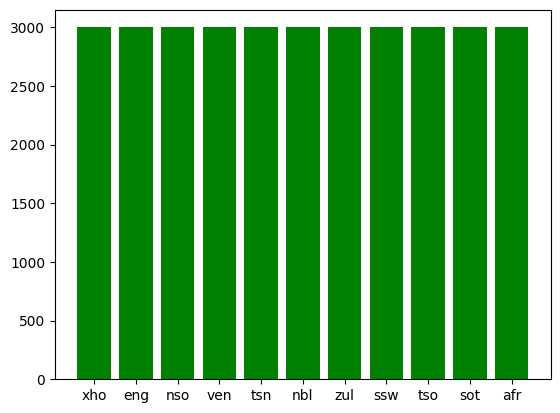

In [43]:
labels_counts = train_df['lang_id'].value_counts()
fre = [x for x in labels_counts]
labels = train_df.lang_id.unique()

data_plot = {}

for lang,count in zip(labels,labels_counts):
    data_plot[lang] = count

plt.bar(labels, labels_counts, color='green', linestyle='-')
plt.show()

From above, we can observe that the data is balanced. Thus potentially will generate balanced results

# Modelling

In [74]:
#vactorize data

vectorizer = HashingVectorizer(lowercase=True, analyzer='word')
vc_features = vectorizer.fit_transform(train_df['text'])
vc_labels = vectorizer.transform(train_df['lang_id'])

In [75]:
#data split
X_train, X_test, y_train, y_test = train_test_split(vc_features,vc_labels, test_size=0.2,random_state=42)

In [76]:
#fit support vector machine
nfolds = 2

Cs = [ 0.1, 1, 10]
gammas = [0.1, 1]

param_grid = {
    'C'     : Cs,
    'gamma' : gammas
    }

#declare the support vecor model

svm = SVC(C=0.1, gamma=0.1)
svm.fit(X_train.toarray(),X_test)




MemoryError: Unable to allocate 206. GiB for an array with shape (26400, 1048576) and data type float64